In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('./Dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
DATA_PATH = "./Dataset/"

if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
#    print("Dataset folder created")

In [3]:
TRAIN_PATH = "./Dataset/train"
VAL_PATH = "./Dataset/test"

In [4]:
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.applications import VGG16


In [5]:

TRAIN_COVID_PATH = "./Dataset/train/COVID19"
TRAIN_NORMAL_PATH = "./Dataset/train/NORMAL"
TRAIN_PNE_PATH = "./Dataset/train/PNEUMONIA"


VAL_NORMAL_PATH = "./Dataset/test/NORMAL"
VAL_PNEU_PATH = "./Dataset/test/PNEUMONIA"
VAL_COVID_PATH = "./Dataset/test/COVID19"

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
   # shear_range = 0.2,
   # zoom_range = 0.2,
    #horizontal_flip = True,
)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 5144 images belonging to 3 classes.


In [7]:
train_generator.class_indices


{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [8]:


validation_generator = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')



Found 1288 images belonging to 3 classes.


In [9]:
epochs = 100
stepsperepoch=9
validationsteps=1

In [10]:


annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("own.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)



In [11]:
model = VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
hist = model.fit_generator(
    train_generator,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data=validation_generator,
    validation_steps = validationsteps
)


C:\Users\supriti.ghosh\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
9/9 [==============================] - 110s 12s/step - loss: 13.6621 - accuracy: 0.6246 - val_loss: 1.0416 - val_accuracy: 0.2812

Epoch 00001: val_loss improved from inf to 1.04165, saving model to own.h5
Epoch 2/100
9/9 [==============================] - 105s 12s/step - loss: 1.0405 - accuracy: 0.3730 - val_loss: 1.0068 - val_accuracy: 0.5938

Epoch 00002: val_loss improved from 1.04165 to 1.00680, saving model to own.h5
Epoch 3/100
9/9 [==============================] - 108s 12s/step - loss: 0.9304 - accuracy: 0.7099 - val_loss: 0.6771 - val_accuracy: 0.7500

Epoch 00003: val_loss improved from 1.00680 to 0.67709, saving model to own.h5
Epoch 4/100
9/9 [==============================] - 108s 12s/step - loss: 0.8841 - accuracy: 0.6337 - val_loss: 0.7912 - val_accuracy: 0.6875

Epoch 00004: val_loss did not improve from 0.67709
Epoch 5/100
9/9 [==============================] - 108s 12s/step - loss: 0.8969 - accuracy: 0.6079 - val_loss: 0.8453 - val_accuracy: 0.6250

Epoch

Epoch 25/100
9/9 [==============================] - 107s 12s/step - loss: 0.8089 - accuracy: 0.6708 - val_loss: 0.8478 - val_accuracy: 0.6562

Epoch 00025: val_loss did not improve from 0.67709
Epoch 26/100
9/9 [==============================] - 113s 13s/step - loss: 0.8821 - accuracy: 0.6470 - val_loss: 0.8467 - val_accuracy: 0.6562

Epoch 00026: val_loss did not improve from 0.67709
Epoch 27/100
9/9 [==============================] - 110s 12s/step - loss: 0.8628 - accuracy: 0.6445 - val_loss: 1.1119 - val_accuracy: 0.4375

Epoch 00027: val_loss did not improve from 0.67709
Epoch 28/100
9/9 [==============================] - 107s 12s/step - loss: 0.7987 - accuracy: 0.6991 - val_loss: 0.7317 - val_accuracy: 0.7188

Epoch 00028: val_loss did not improve from 0.67709
Epoch 29/100
9/9 [==============================] - 107s 12s/step - loss: 0.8136 - accuracy: 0.6604 - val_loss: 0.8467 - val_accuracy: 0.6250

Epoch 00029: val_loss did not improve from 0.67709
Epoch 30/100
9/9 [============

Epoch 49/100
9/9 [==============================] - 118s 13s/step - loss: 0.8011 - accuracy: 0.6741 - val_loss: 0.8761 - val_accuracy: 0.6250

Epoch 00049: val_loss did not improve from 0.61966
Epoch 50/100
9/9 [==============================] - 124s 14s/step - loss: 0.8228 - accuracy: 0.6987 - val_loss: 0.8441 - val_accuracy: 0.6250

Epoch 00050: val_loss did not improve from 0.61966
Epoch 51/100
9/9 [==============================] - 122s 13s/step - loss: 0.8527 - accuracy: 0.6515 - val_loss: 0.8140 - val_accuracy: 0.6875

Epoch 00051: val_loss did not improve from 0.61966
Epoch 52/100
9/9 [==============================] - 148s 15s/step - loss: 0.7982 - accuracy: 0.6816 - val_loss: 0.9146 - val_accuracy: 0.6875

Epoch 00052: val_loss did not improve from 0.61966
Epoch 53/100
9/9 [==============================] - 110s 12s/step - loss: 0.7770 - accuracy: 0.6839 - val_loss: 0.6525 - val_accuracy: 0.8125

Epoch 00053: val_loss did not improve from 0.61966
Epoch 54/100
9/9 [============

Epoch 73/100
9/9 [==============================] - 107s 12s/step - loss: 0.8184 - accuracy: 0.6600 - val_loss: 0.6569 - val_accuracy: 0.7812

Epoch 00073: val_loss did not improve from 0.61966
Epoch 74/100
9/9 [==============================] - 106s 12s/step - loss: 0.8966 - accuracy: 0.6306 - val_loss: 0.7514 - val_accuracy: 0.7188

Epoch 00074: val_loss did not improve from 0.61966
Epoch 75/100
9/9 [==============================] - 107s 12s/step - loss: 0.8216 - accuracy: 0.6717 - val_loss: 0.7484 - val_accuracy: 0.6875

Epoch 00075: val_loss did not improve from 0.61966
Epoch 76/100
9/9 [==============================] - 107s 12s/step - loss: 0.7929 - accuracy: 0.6976 - val_loss: 0.7164 - val_accuracy: 0.7188

Epoch 00076: val_loss did not improve from 0.61966
Epoch 77/100
9/9 [==============================] - 107s 12s/step - loss: 0.8495 - accuracy: 0.6428 - val_loss: 0.6848 - val_accuracy: 0.7500

Epoch 00077: val_loss did not improve from 0.61966
Epoch 78/100
9/9 [============

Epoch 97/100
9/9 [==============================] - 106s 12s/step - loss: 0.8063 - accuracy: 0.6728 - val_loss: 0.6274 - val_accuracy: 0.8438

Epoch 00097: val_loss did not improve from 0.61966
Epoch 98/100
9/9 [==============================] - 106s 12s/step - loss: 0.8723 - accuracy: 0.6598 - val_loss: 0.9067 - val_accuracy: 0.5938

Epoch 00098: val_loss did not improve from 0.61966
Epoch 99/100
9/9 [==============================] - 106s 12s/step - loss: 0.8420 - accuracy: 0.6717 - val_loss: 0.8179 - val_accuracy: 0.7188

Epoch 00099: val_loss did not improve from 0.61966
Epoch 100/100
9/9 [==============================] - 107s 12s/step - loss: 0.7816 - accuracy: 0.7190 - val_loss: 0.8732 - val_accuracy: 0.5938

Epoch 00100: val_loss did not improve from 0.61966


In [ ]:
preds = model.evaluate(validation_generator)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

35/41 [========================>.....] - ETA: 17s - loss: 0.8345 - accuracy: 0.6625

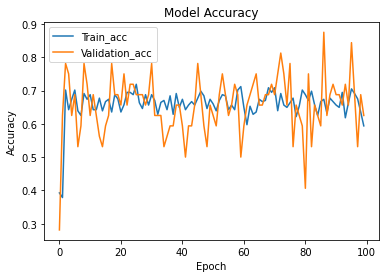

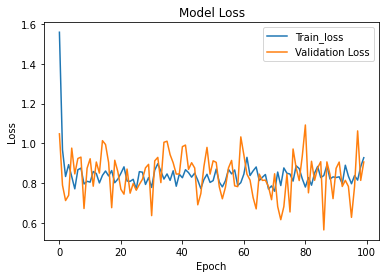

In [15]:


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

